1.1. Należy wczytać dane.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv('iris.csv')

1.2. Sprawdzić podstawowe statystyki.

In [118]:
statystyki = df.describe()

print(statystyki)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


1.3. Sprawdzić kompletność danych.

In [119]:
brakujace = df.isnull().sum()
print(brakujace)

print(df.isnull().values.any())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
False


1.4. Przeprowadzić normalizację danych w zakresie [0,1] na kolumnach (z wyłączeniem
kolumny species).

In [120]:
kolumny_do_normalizacji = df.columns.drop('species')

scaler = MinMaxScaler()

df[kolumny_do_normalizacji] = scaler.fit_transform(df[kolumny_do_normalizacji])

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0      0.222222     0.625000      0.067797     0.041667  setosa
1      0.166667     0.416667      0.067797     0.041667  setosa
2      0.111111     0.500000      0.050847     0.041667  setosa
3      0.083333     0.458333      0.084746     0.041667  setosa
4      0.194444     0.666667      0.067797     0.041667  setosa


1.5. Przeprowadzić normalizację danych w zakresie [-1,1] na kolumnach (z wyłączeniem
kolumny species)

In [121]:
scaler = MinMaxScaler(feature_range=(-1, 1))

df[kolumny_do_normalizacji] = scaler.fit_transform(df[kolumny_do_normalizacji])

1.6. Przeprowadzić standaryzację danych na kolumnach (z wyłączeniem kolumny
species).

In [122]:
scaler = StandardScaler()

kolumny_do_standaryzacji = df.columns.drop('species')

df[kolumny_do_standaryzacji] = scaler.fit_transform(df[kolumny_do_standaryzacji])

1.7. Narysować wykres zbiorczy, składający się z 4 wykresów, zależności długości płatka
[cm] od szerokości płatka [cm] różnicowany na podstawie gatunku dla danych
pierwotnych, znormalizowanych w zakresie [0,1], znormalizowanych w zakresie [-
1,1] oraz standaryzowanych.

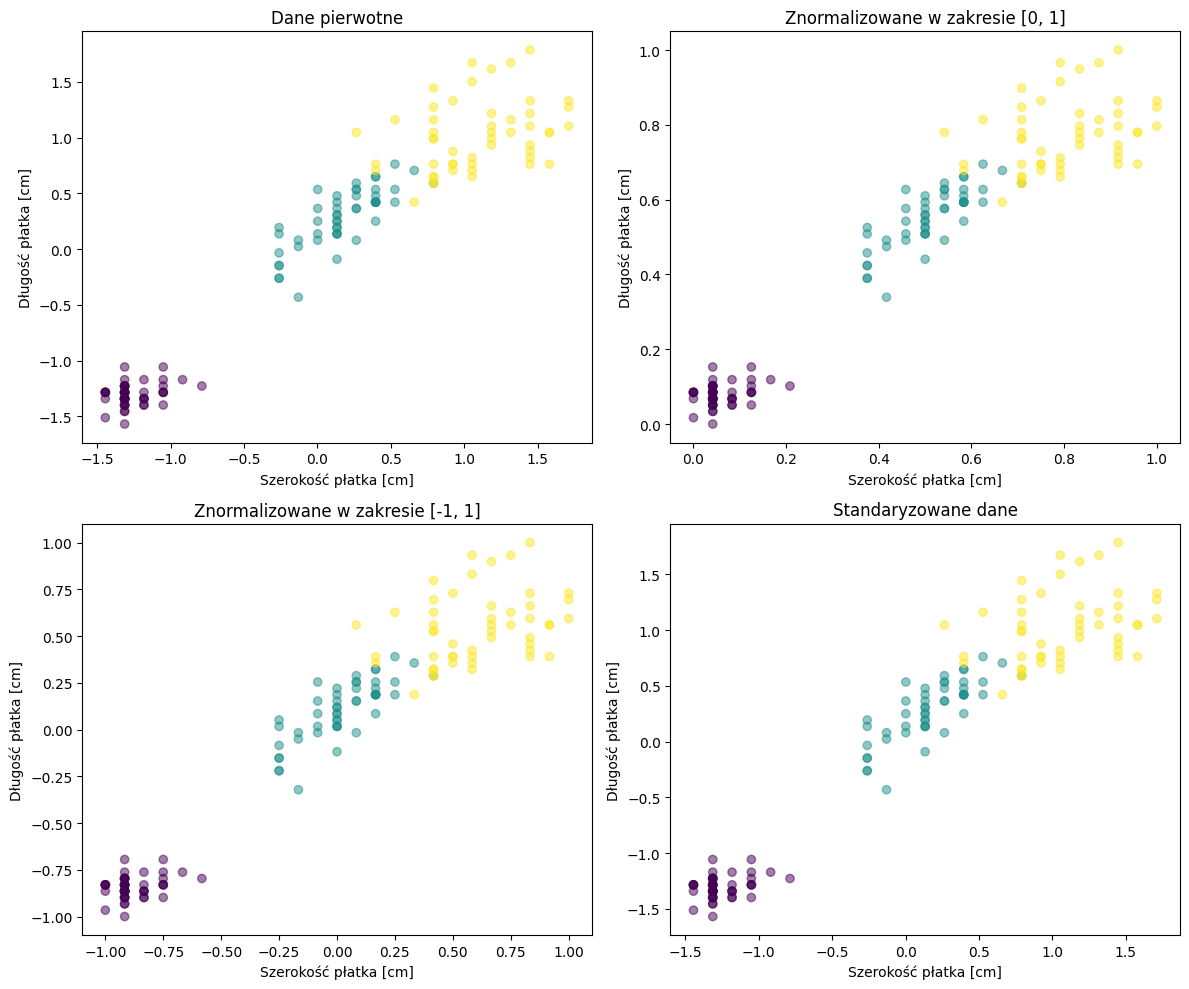

In [123]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].scatter(df['petal_width'], df['petal_length'], c=df['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
axs[0, 0].set_title('Dane pierwotne')
axs[0, 0].set_xlabel('Szerokość płatka [cm]')
axs[0, 0].set_ylabel('Długość płatka [cm]')

scaler_01 = MinMaxScaler(feature_range=(0, 1))
df_01 = df.copy()
df_01[kolumny_do_normalizacji] = scaler_01.fit_transform(df_01[kolumny_do_normalizacji])

axs[0, 1].scatter(df_01['petal_width'], df_01['petal_length'], c=df_01['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
axs[0, 1].set_title('Znormalizowane w zakresie [0, 1]')
axs[0, 1].set_xlabel('Szerokość płatka [cm]')
axs[0, 1].set_ylabel('Długość płatka [cm]')

scaler_neg_1_1 = MinMaxScaler(feature_range=(-1, 1))
df_neg_1_1 = df.copy()
df_neg_1_1[kolumny_do_normalizacji] = scaler_neg_1_1.fit_transform(df_neg_1_1[kolumny_do_normalizacji])

axs[1, 0].scatter(df_neg_1_1['petal_width'], df_neg_1_1['petal_length'], c=df_neg_1_1['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
axs[1, 0].set_title('Znormalizowane w zakresie [-1, 1]')
axs[1, 0].set_xlabel('Szerokość płatka [cm]')
axs[1, 0].set_ylabel('Długość płatka [cm]')

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[kolumny_do_normalizacji] = scaler.fit_transform(df_standardized[kolumny_do_normalizacji])

axs[1, 1].scatter(df_standardized['petal_width'], df_standardized['petal_length'], c=df_standardized['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
axs[1, 1].set_title('Standaryzowane dane')
axs[1, 1].set_xlabel('Szerokość płatka [cm]')
axs[1, 1].set_ylabel('Długość płatka [cm]')

plt.tight_layout()
plt.show()

1.8. Narysować wykres zbiorczy, składający się z 4 wykresów, zależności długości
kielicha [cm] od szerokości kielicha [cm] różnicowany na podstawie gatunku dla
danych pierwotnych, znormalizowanych w zakresie [0,1], znormalizowanych w
zakresie [-1,1] oraz standaryzowanych.

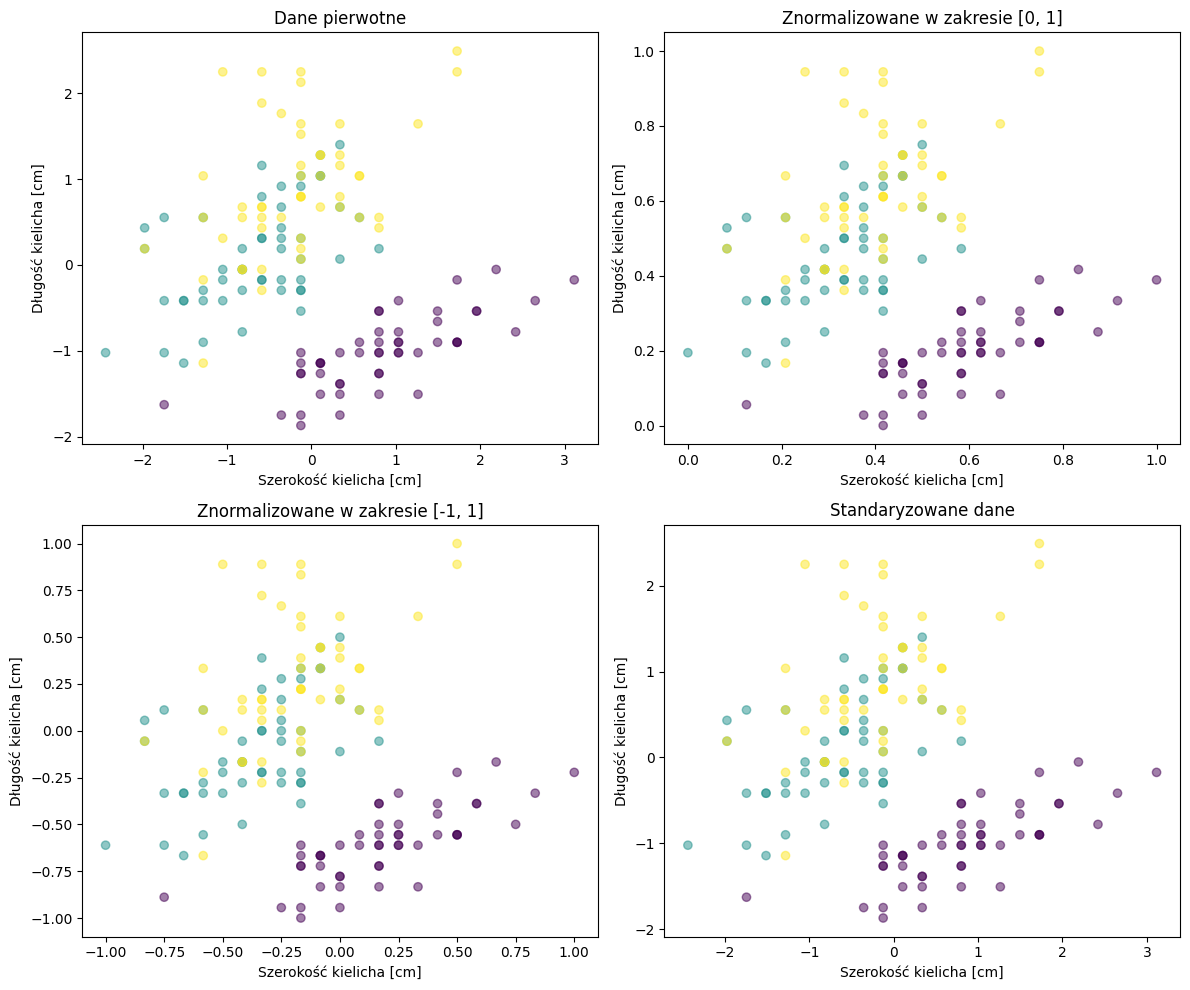

In [124]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].scatter(df['sepal_width'], df['sepal_length'], c=df['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
axs[0, 0].set_title('Dane pierwotne')
axs[0, 0].set_xlabel('Szerokość kielicha [cm]')
axs[0, 0].set_ylabel('Długość kielicha [cm]')

scaler_01 = MinMaxScaler(feature_range=(0, 1))
df_01 = df.copy()
df_01[kolumny_do_normalizacji] = scaler_01.fit_transform(df_01[kolumny_do_normalizacji])

axs[0, 1].scatter(df_01['sepal_width'], df_01['sepal_length'], c=df_01['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
axs[0, 1].set_title('Znormalizowane w zakresie [0, 1]')
axs[0, 1].set_xlabel('Szerokość kielicha [cm]')
axs[0, 1].set_ylabel('Długość kielicha [cm]')

scaler_neg_1_1 = MinMaxScaler(feature_range=(-1, 1))
df_neg_1_1 = df.copy()
df_neg_1_1[kolumny_do_normalizacji] = scaler_neg_1_1.fit_transform(df_neg_1_1[kolumny_do_normalizacji])

axs[1, 0].scatter(df_neg_1_1['sepal_width'], df_neg_1_1['sepal_length'], c=df_neg_1_1['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
axs[1, 0].set_title('Znormalizowane w zakresie [-1, 1]')
axs[1, 0].set_xlabel('Szerokość kielicha [cm]')
axs[1, 0].set_ylabel('Długość kielicha [cm]')

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[kolumny_do_normalizacji] = scaler.fit_transform(df_standardized[kolumny_do_normalizacji])

axs[1, 1].scatter(df_standardized['sepal_width'], df_standardized['sepal_length'], c=df_standardized['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
axs[1, 1].set_title('Standaryzowane dane')
axs[1, 1].set_xlabel('Szerokość kielicha [cm]')
axs[1, 1].set_ylabel('Długość kielicha [cm]')

plt.tight_layout()
plt.show()

Zbiór danych dotyczy serii zarejestrowanych pomiarów w postaci widm df_3a w czasie.
Widmo df_3a to wykres intensywności rozproszonego promieniowania df_3a w
funkcji różnicy częstotliwości w stosunku do promieniowania padającego. W pierwszym
wierszu znajdują się jednostki (Wavenumber [cm^-1], Intensity [a.u.]), w drugim
oznaczenia kolejnych pomiarów, ti. Pierwsza kolumna odnosi się do zakresu pomiarowego,
w którym rejestrowane były widma (oś horyzontalna). Pozostałe kolumny odnoszą się do
poszczególnych pomiarów. Należy wykonać następujące operacje:

2.1. Przeprowadzić normalizację danych: każde widmo należy znormalizować do
amplitudy pasma przy 985 cm-1

(z wyłączeniem kolumny Wavenumber [cm^-1]).

In [125]:
data = pd.read_csv('Zad2_L1.csv', sep=';', decimal=',')
data = data.replace(',', '.', regex=True)
data = data.drop(index=0).reset_index(drop=True)

wavenumber_column = data.columns.difference(['Wavenumber [cm^-1]'])
data[wavenumber_column] = data[wavenumber_column].apply(pd.to_numeric, errors='coerce')

target_index = data[data['Wavenumber [cm^-1]'].astype(str).str.startswith('985')].index[0]

print(data[wavenumber_column])
data_copy = data
wavenumber_column_copy = wavenumber_column

amplitude_at_target = data_copy.loc[target_index, wavenumber_column_copy]  
normalized_intensity =data_copy[wavenumber_column_copy].div(amplitude_at_target)

print(normalized_intensity)

      Intensity [a.u.]  Intensity [a.u.].1  Intensity [a.u.].2  \
0             0.006048            0.007059            0.009829   
1             0.005961            0.007120            0.009688   
2             0.005874            0.007230            0.009547   
3             0.005577            0.007010            0.009466   
4             0.005410            0.006690            0.009575   
...                ...                 ...                 ...   
1757          0.002559           -0.000332            0.002336   
1758          0.002142           -0.000420            0.002818   
1759          0.001934           -0.000218            0.002681   
1760          0.001877            0.000294            0.002083   
1761          0.001740            0.000605            0.001626   

      Intensity [a.u.].3  Intensity [a.u.].4  Intensity [a.u.].5  
0               0.010507            0.009625            0.012082  
1               0.010243            0.010031            0.011809  
2     

2.2. Narysować wykres zbiorczy składający się z 2 wykresów: widma dla danych
surowych oraz widma znormalizowane.

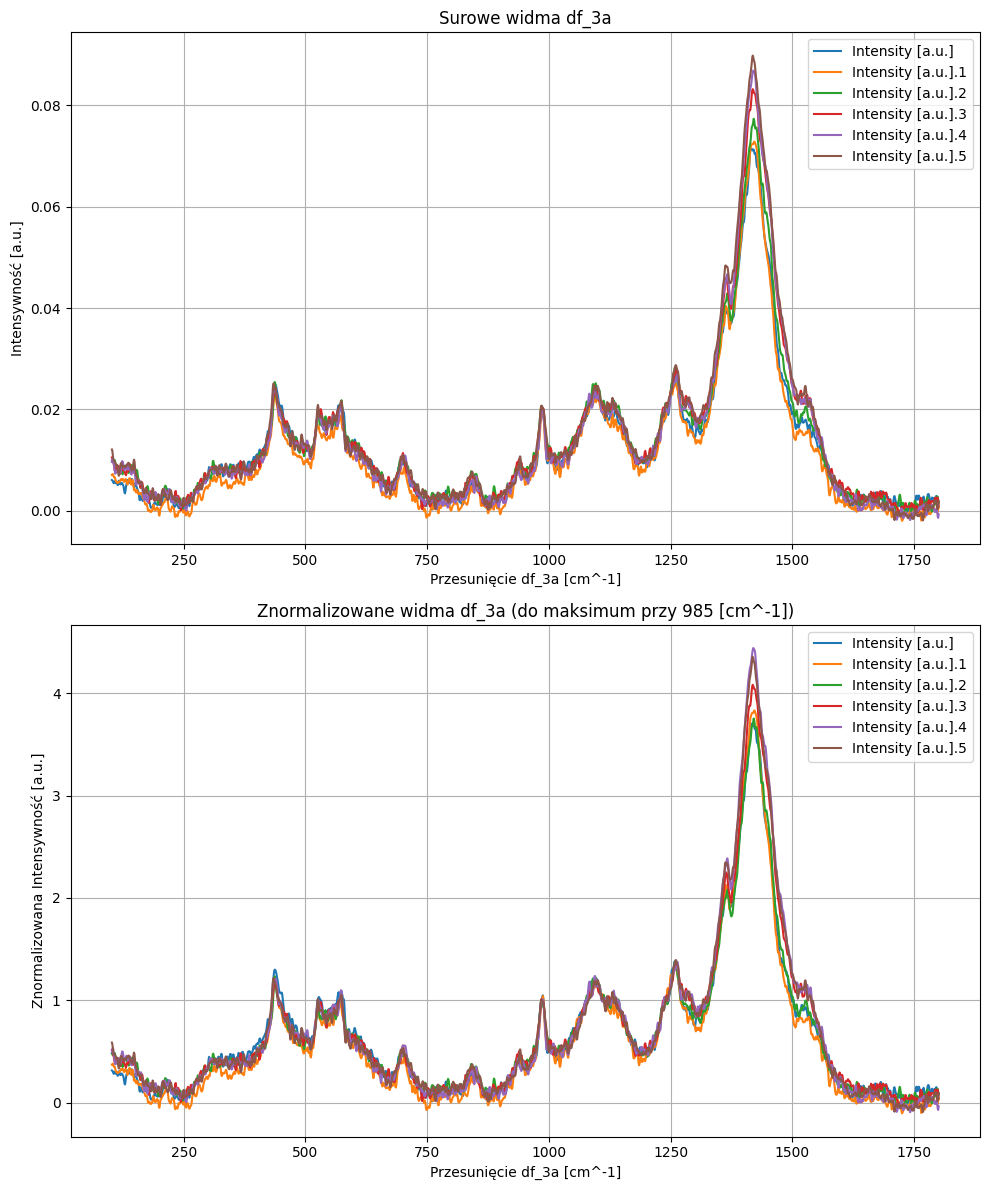

In [126]:
raw_wavenumber = data['Wavenumber [cm^-1]']

raw_intensity = data[wavenumber_column]
normalized_intensity = normalized_intensity

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# wykres dla surowych danych
for col in wavenumber_column:
    axs[0].plot(raw_wavenumber, raw_intensity[col], label=col)
axs[0].set_title('Surowe widma df_3a')
axs[0].set_xlabel('Przesunięcie df_3a [cm^-1]')
axs[0].set_ylabel('Intensywność [a.u.]')
axs[0].legend(loc='upper right')
axs[0].grid(True)

# wykres dla znormalizowanych danych
for col in wavenumber_column:
    axs[1].plot(raw_wavenumber, normalized_intensity[col], label=col)
axs[1].set_title('Znormalizowane widma df_3a (do maksimum przy 985 [cm^-1])')
axs[1].set_xlabel('Przesunięcie df_3a [cm^-1]')
axs[1].set_ylabel('Znormalizowana Intensywność [a.u.]')
axs[1].legend(loc='upper right')
axs[1].grid(True)

plt.tight_layout()
plt.show()

2.3. Jaka jest przyczyna zastosowania powyższego sposobu normalizacji?

Porównywalność widm: Normalizacja umożliwia porównanie intensywności różnych widm na tej samej skali, co ułatwia identyfikację różnic.

Eliminacja wpływu warunków pomiarowych: Pomaga zredukować zmienne związane z różnymi warunkami eksperymentalnymi, co poprawia interpretację wyników.

Skupienie na kształcie widma: Umożliwia analizę relacji między intensywnościami pików, co jest kluczowe w analizach chemicznych.

Ułatwienie dalszej analizy: Normalizacja przygotowuje dane do zaawansowanych metod statystycznych, które lepiej działają na znormalizowanych danych.

Identyfikacja anomalii: Ułatwia zauważenie nietypowych zmian, które mogą wskazywać na interesujące zjawiska chemiczne.

# 3. Proszę o wczytanie pliku Zad3_L1.csv
Zbiór danych dotyczy serii zarejestrowanych pomiarów w postaci widm FTIR w czasie.
Widmo w podczerwieni obrazuje intensywność widma w podczerwieni. Pierwsza kolumna
odnosi się do zakresu pomiarowego (oś pozioma), w którym rejestrowane były widma
(Wavenumber [cm^-1]). Pozostałe kolumny (Absorbance [a.u.])) odnoszą się do widm
rejestrowanych po upływie określonego czasu (oś wertykalna). Należy wykonać
następujące operacje:

In [127]:
df_3 = pd.read_csv('Zad3_L1.csv', sep=';', decimal=',')

print(df_3.head())

   Wavenumber [cm^-1]     3 min    30 min    60 min    90 min   120 min  \
0            525.0251 -0.009406 -0.004727 -0.008923  0.000000 -0.010655   
1            525.2661 -0.007316 -0.004123 -0.008593  0.000155 -0.010266   
2            525.5072 -0.005362 -0.003581 -0.008142  0.000257 -0.009673   
3            525.7482 -0.004040 -0.003063 -0.007549  0.000304 -0.008918   
4            525.9893 -0.003421 -0.002554 -0.006850  0.000467 -0.008159   

    150 min   180 min   300 min   360 min  1800 min  
0  0.000000 -0.001319  0.000000  0.000000  0.000000  
1  0.000538 -0.001846  0.000744  0.000147 -0.000066  
2  0.001312 -0.002225  0.001452  0.000452 -0.000073  
3  0.001741 -0.002328  0.002208  0.000884  0.000012  
4  0.001232 -0.002201  0.003054  0.001383  0.000210  


3.1. Przeprowadzić normalizację danych: każde widm należy znormalizować do pola
powierzchni pod wykresem (z wyłączeniem kolumny Wavenumber [cm^-1]).

In [128]:
intensity_columns = df_3.columns.drop('Wavenumber [cm^-1]')

surface_areas = df_3[intensity_columns].apply(lambda x: np.abs(x).sum())

df_3_normalized = df_3.copy()

df_3_normalized[intensity_columns] = df_3[intensity_columns].div(surface_areas)

print(df_3_normalized.head())


   Wavenumber [cm^-1]     3 min    30 min    60 min        90 min   120 min  \
0            525.0251 -0.000004 -0.000002 -0.000003  0.000000e+00 -0.000005   
1            525.2661 -0.000003 -0.000002 -0.000003  5.994996e-08 -0.000005   
2            525.5072 -0.000002 -0.000002 -0.000003  9.940090e-08 -0.000004   
3            525.7482 -0.000002 -0.000001 -0.000003  1.175793e-07 -0.000004   
4            525.9893 -0.000002 -0.000001 -0.000002  1.806234e-07 -0.000004   

        150 min       180 min       300 min       360 min      1800 min  
0  0.000000e+00 -5.334053e-07  0.000000e+00  0.000000e+00  0.000000e+00  
1  2.220944e-07 -7.463521e-07  3.704789e-07  1.151000e-07 -1.588657e-07  
2  5.417382e-07 -8.995332e-07  7.228740e-07  3.539128e-07 -1.757406e-07  
3  7.188168e-07 -9.411158e-07  1.099299e-06  6.921658e-07  2.989278e-08  
4  5.086297e-07 -8.897782e-07  1.520537e-06  1.082714e-06  5.062487e-07  


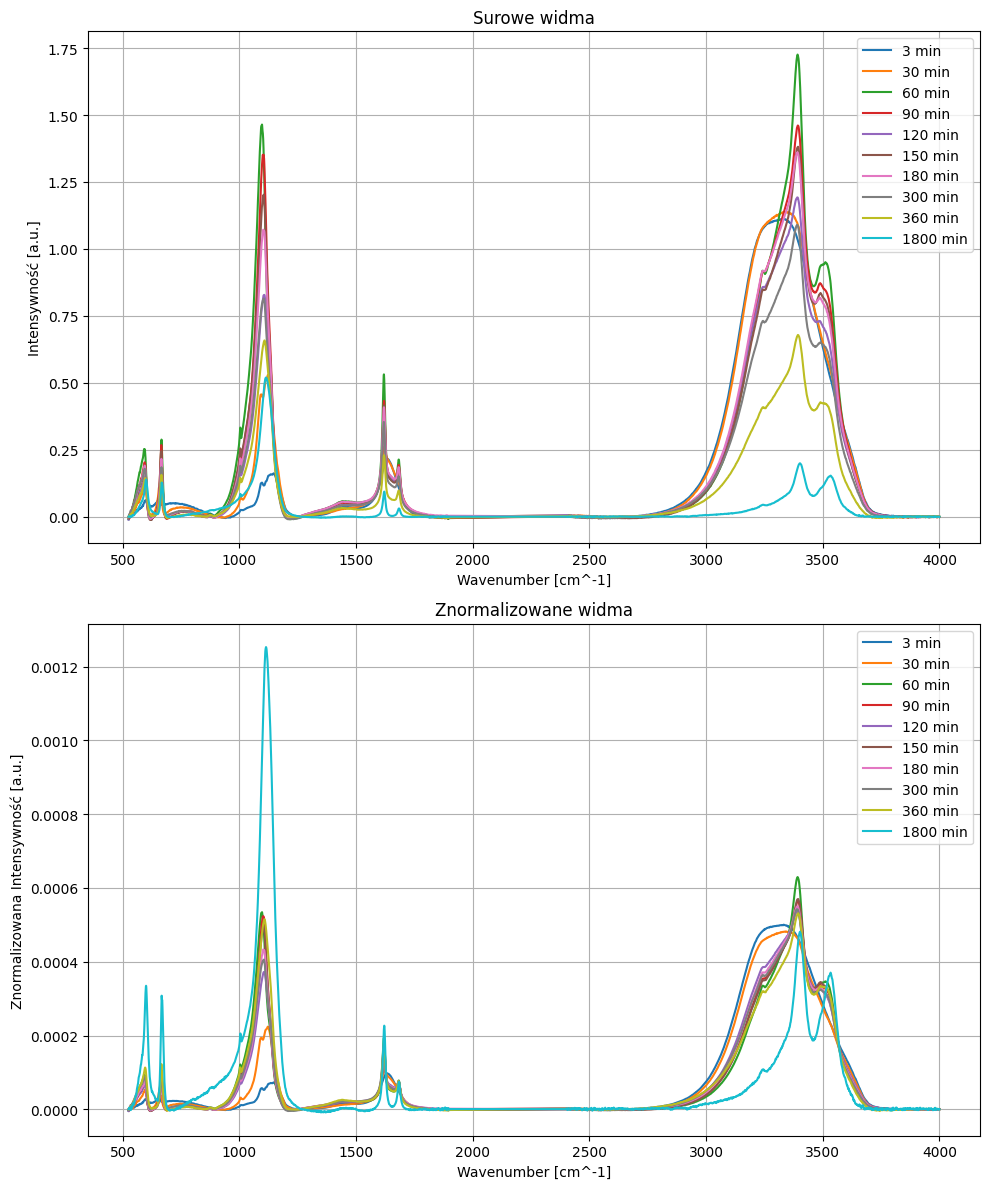

In [129]:
plt.figure(figsize=(10, 12))

ax1 = plt.subplot(2, 1, 1)
for intensity in intensity_columns:
    ax1.plot(df_3['Wavenumber [cm^-1]'], df_3[intensity], label=intensity)
ax1.set_title('Surowe widma')
ax1.set_xlabel('Wavenumber [cm^-1]')
ax1.set_ylabel('Intensywność [a.u.]')
ax1.legend()
ax1.grid(True)

ax2 = plt.subplot(2, 1, 2)
for intensity in intensity_columns:
    ax2.plot(df_3_normalized['Wavenumber [cm^-1]'], df_3_normalized[intensity], label=intensity)
ax2.set_title('Znormalizowane widma')
ax2.set_xlabel('Wavenumber [cm^-1]')
ax2.set_ylabel('Znormalizowana Intensywność [a.u.]')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

3.3. Jaka jest przyczyna zastosowania powyższego sposobu normalizacji?

Pozwala to na porównywanie różnych widm, niezależnie od ich intensywności. Ułatwia to analizę kształtu widma, minimalizuje wpływ tła i standardyzuje wyniki, co zwiększa ich wiarygodność i porównywalność.